# ECE-GY 6143 Midterm
## Guandong Kou (gk1675)

In [1]:
run styles.ipynb

## Problem 1

### 1a)
Yes. It is linear in $\alpha$.

### 1b)
No. It is not linear. 

### 1c)

In [ ]:
def transform(X, beta):
    Z = np.exp(-np.multiply(beta, X))
    return Z

## Problem 2

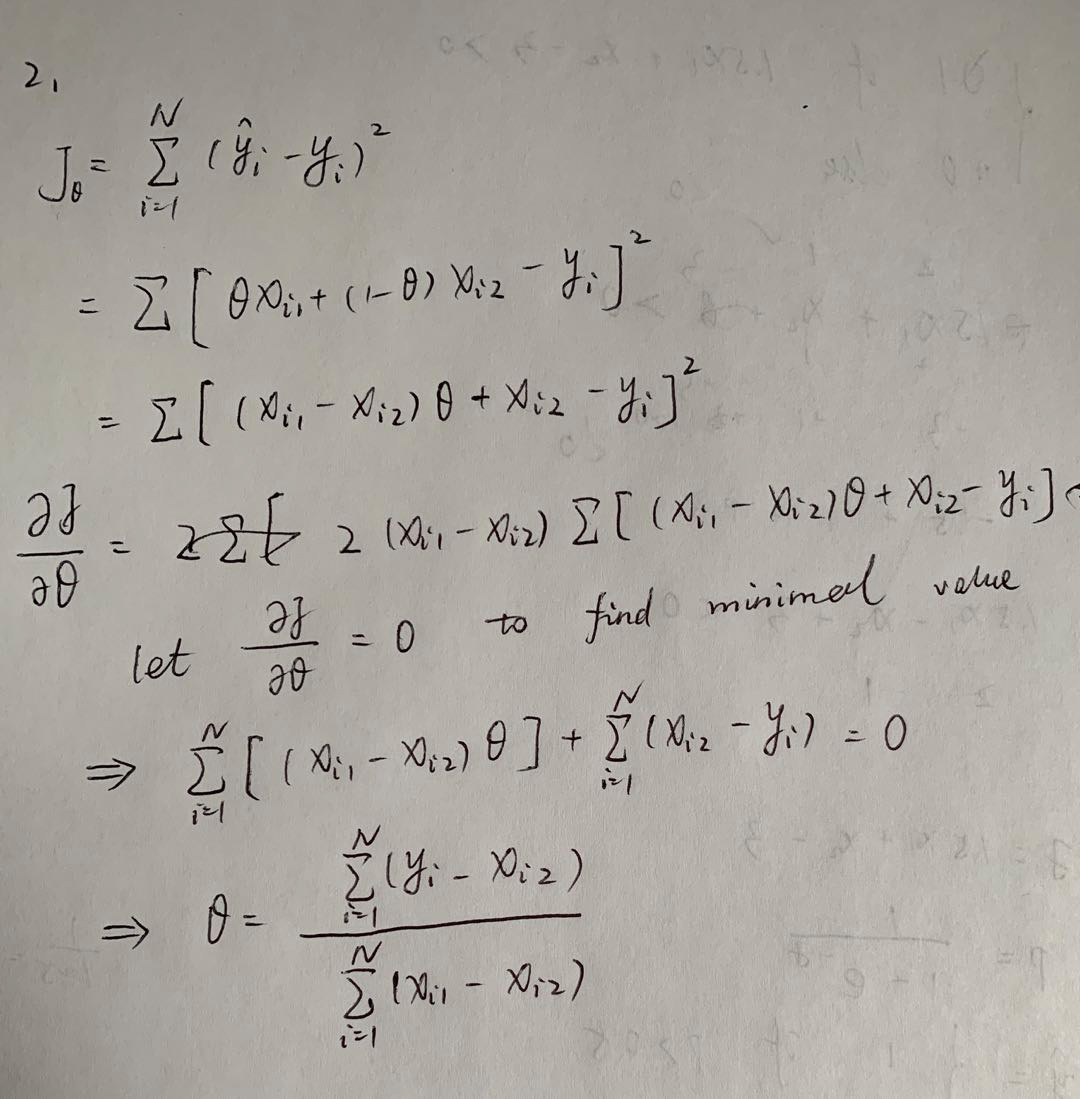

## Problem 3

### 3a)
d = 5

### 3b)
d = 4

### 3c)
B

## Problem 4

### 4a)

In order to reduce duplicate code, here a factory function is defined for reuse later.

In [2]:
def get_model(X, y, test_size=0.3):
    Xtr, Xts, ytr, yts = train_test_split(X, y, test_size, shuffle=True)
    model = LogisticRegression() 
    model.fit(Xtr, ytr)
    yhat = regr.predict(Xts)
    accuracy = np.mean(yhat == yts)
    return model, accuracy

In [ ]:
model_1, acc_1 = get_model(X1, y1)
model_2, acc_2 = get_model(X2, y2)

### 4b)
Re-use the same model generation function from 4a), but with vertical stack of X and Y values of the two cities.

In [ ]:
# add a new feature denoting "the current city is city 1"
X1 = np.hstack((X1, np.ones((len(X1), 1))))
X2 = np.hstack((X1, np.zeros((len(X2), 1))))
X = np.vstack((X1, X2))
y = np.vstack((y1, y2))
# combined model and its accuracy
model_comb, acc_comb = get_model(X, y)

### 4c)

- If the amount of data is not large enough, it is better to use the combined model. Because 
    - the city is also taken into consideration as a new feature
    - the data from city 1 and city 2 can be used together to reduce overfit 
- If the amount of data is sufficiently large, there is no big difference in the accuracy of the two approaches. However, the combined model is still preferred from an engineering view, because 
    - we only need to maintain one model
    - the combined model has better extensibility (if we want to add another new city later, we can simply add a new feature rather than training another model)

## Problem 5

### 5a)
$$
y = 
\begin{cases}
1 & (1.5x_1 + x_2 - 3 > 0) \\
0 & (otherwise)
\end{cases}
$$

### 5b)

$$
P(y=1|x) = \frac{1}{1+e^{-z}} 
$$

Insert (2, 0), (0,3) in to z to get z = 0, and insert (2,2) to get z = ln4

$$
\Rightarrow
z = （0.75 x_1 + 0.5x_2 - 1.5) ln4
$$

## Problem 6

### 6a)

w is a 50x1 vector with 2 at index 0, -3 at index 11, 4 at index 30, and 0 elsewhere.

In [ ]:
w = np.zeros((50, 1))
w[0] = 2
w[11] = -3
w[30] = 4

### 6b)
sum of L1 norm

$$
J = \sum_{i=0}^{T-1} [(y_i - \hat{y}_i)^2 + \alpha | w_i |]
$$

## Problem 7

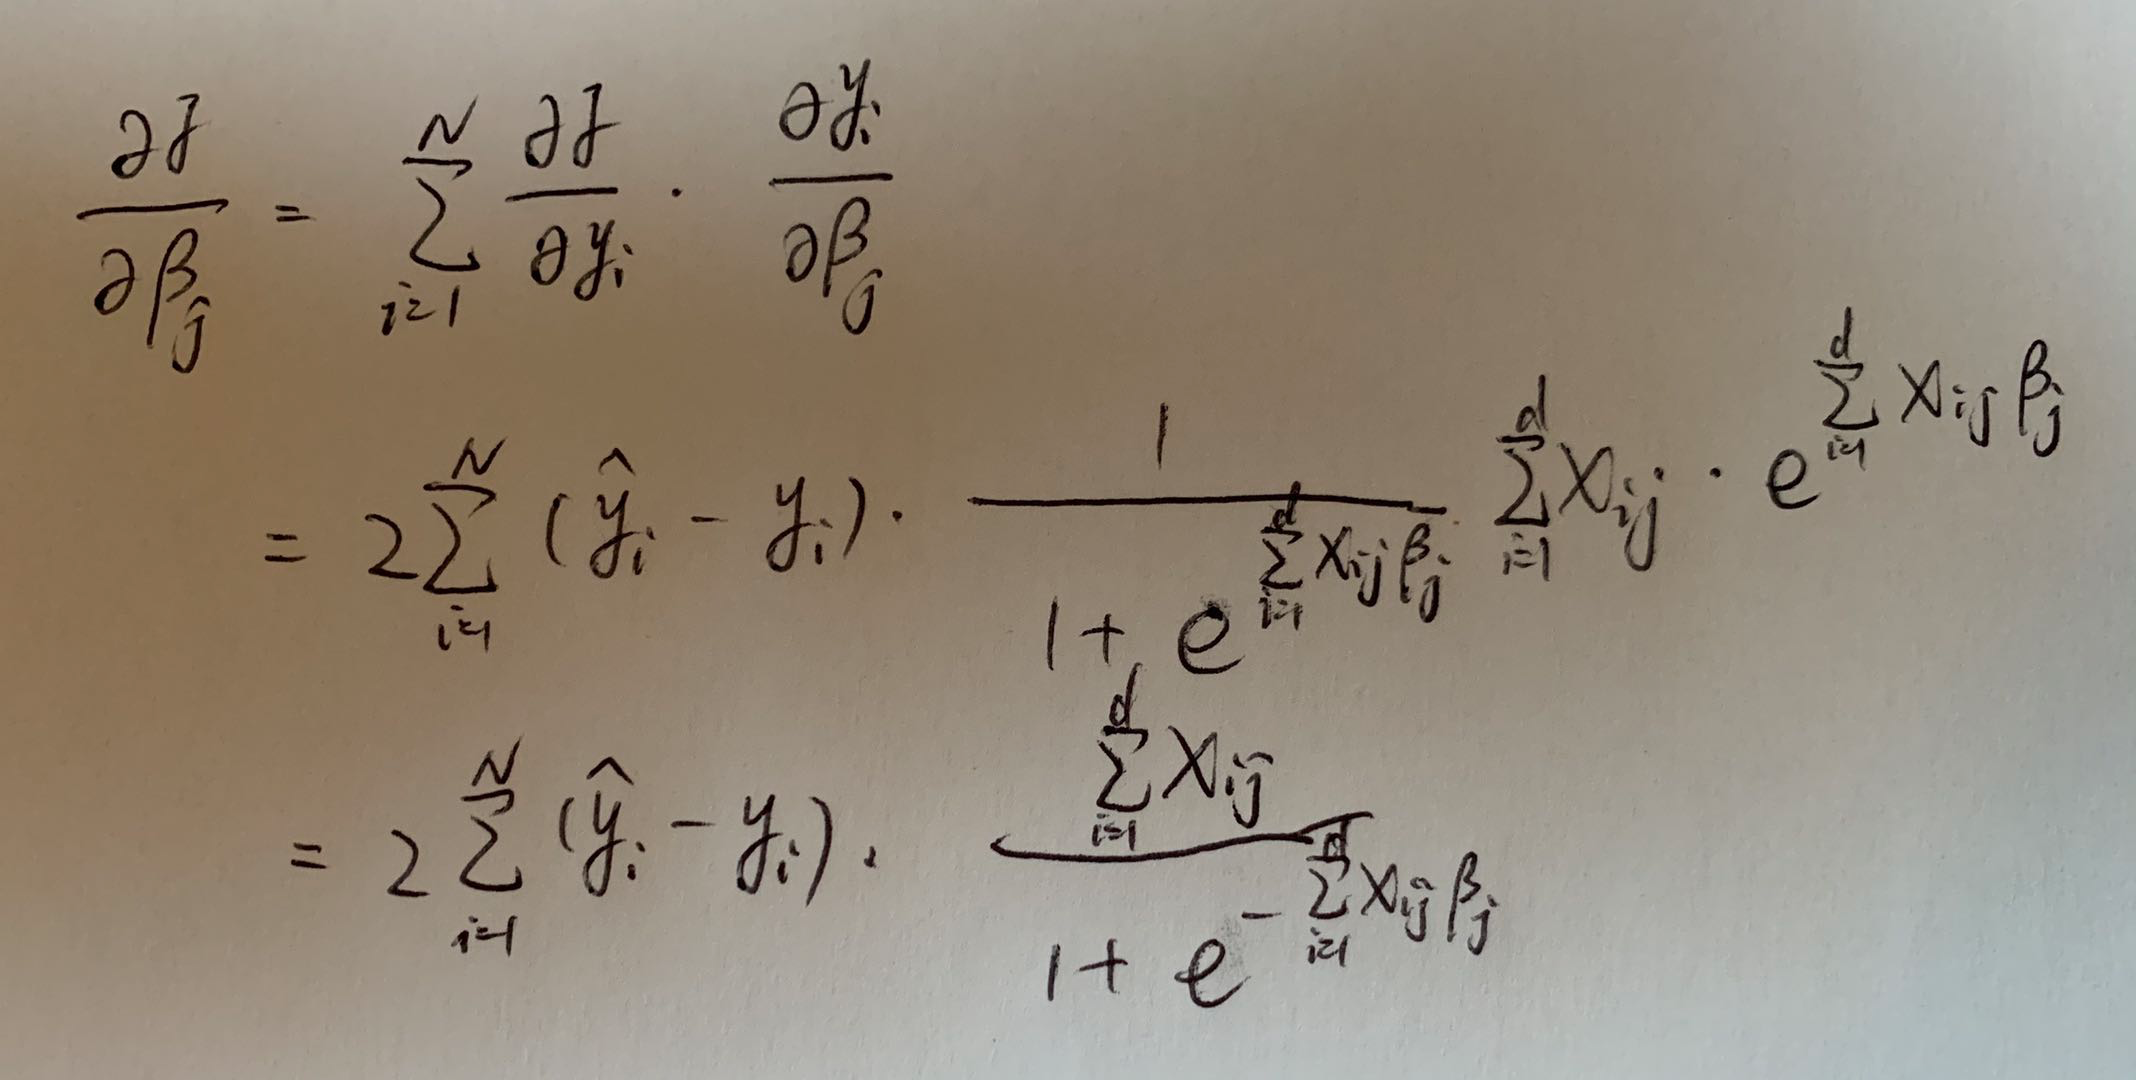

In [ ]:
def get_cost(X, y, beta):
    power = np.exp(np.sum(X.dot(beta[None, :]), axis=1))
    yhat = np.log(1 + power)
    J = np.sum((yhat - y)**2)
    J_grad = 2 * X.T.dot((yhat - y).dot(power) / (1+power))
    return J, J_grad

## Problem 8

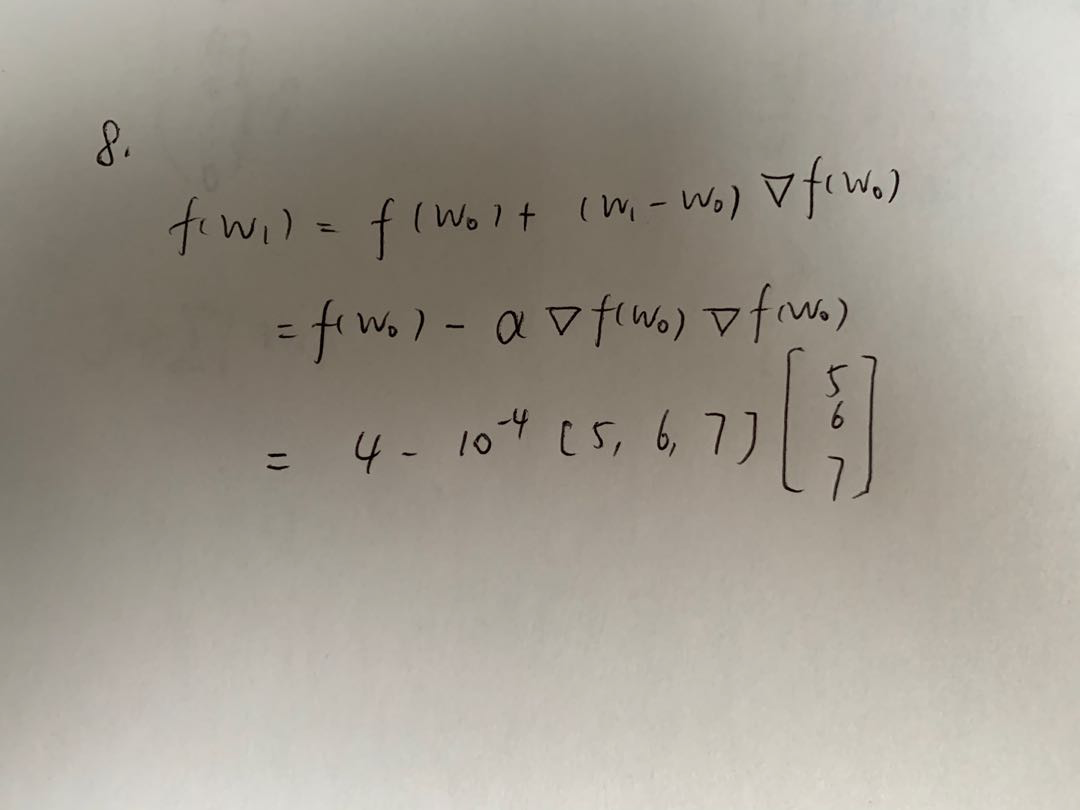

In [ ]:
def linesearch(feval, w0, alpha_min, alpha_max, nalpha):
    alpha_values = np.linspace(alpha_min, alpha_max, nalpha)
    _, f_grad = feval(w0)
    f_values = np.zeros((nalpha,1))
    for i, alpha in enumerate(alpha_values):
        f_values[i], _ = feval(w0 - alpha * f_grad)
    i_opt = np.argmin(f_values) # optimal index
    alpha_opt = alpha_values[i_opt]
    return alpha_opt